<a href="https://colab.research.google.com/github/MatheusRobles/Projeto_Deteccao_de_Fraude/blob/main/Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Link dataset: https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example

#**Variaveis do dataset**

**step** - unidade de tempo (1 hora)

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT e TRANSFER

**amount** - valor da transação na moeda local

**nameOrig** - origem da transação

o**ldbalanceOrg** - saldo inicial (antes da transação)

**newbalanceOrig** - novo saldo (após a transação)

**nameDest** - destinatário da transação

**oldbalanceDest** - saldo inicial antes da transação

**newbalanceDest** - novo saldo após a transação

**isFraud** - São as transações feitas pelos agentes fraudulentos

**isFlaggedFraud** - tentativa ilegal de transferir uma grande quantia de dinheiro em uma única transação

#import e analise do dataset
#heatmap e analise
#balanceamento dos dados - over e under sampling
#definindo train e test
#reg_log - none/balanced
#arvore de decisão - none/balance
#random forest - none/balance
#conclusão


#importando e analisando o dataset

In [2]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/MatheusRobles/Projeto_Deteccao_de_Fraude/main/fraud_dataset_example.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [6]:
df.groupby('isFraud').step.count()

isFraud
0    101497
1       116
Name: step, dtype: int64

In [7]:
df.groupby('isFlaggedFraud').step.count()

isFlaggedFraud
0    101613
Name: step, dtype: int64

Obs:

Com isso sabe-se que o dataset tem 101613 amostras e não possui campos vazios.

Existem uma pequena quantidade de fraudes no dataset, sendo 101497 amostras de não fraude e apenas 116 amostras de fraudes

Nesta fatia do dataset não temos nenhuma amostra em que o isFlaggedFraud é verdadeiro, portanto vamos dropar essa coluna pois ela não é mais necessaria na nossa analise.

In [8]:
df = df.drop('isFlaggedFraud', axis = 1)

para conseguir analisar melhor as categorias da variavel tipo vou utilizar o one-hot enconding.

In [9]:
df = pd.get_dummies(df, columns=['type'])
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


#Heatmap


<ipython-input-49-a386c9886bbc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

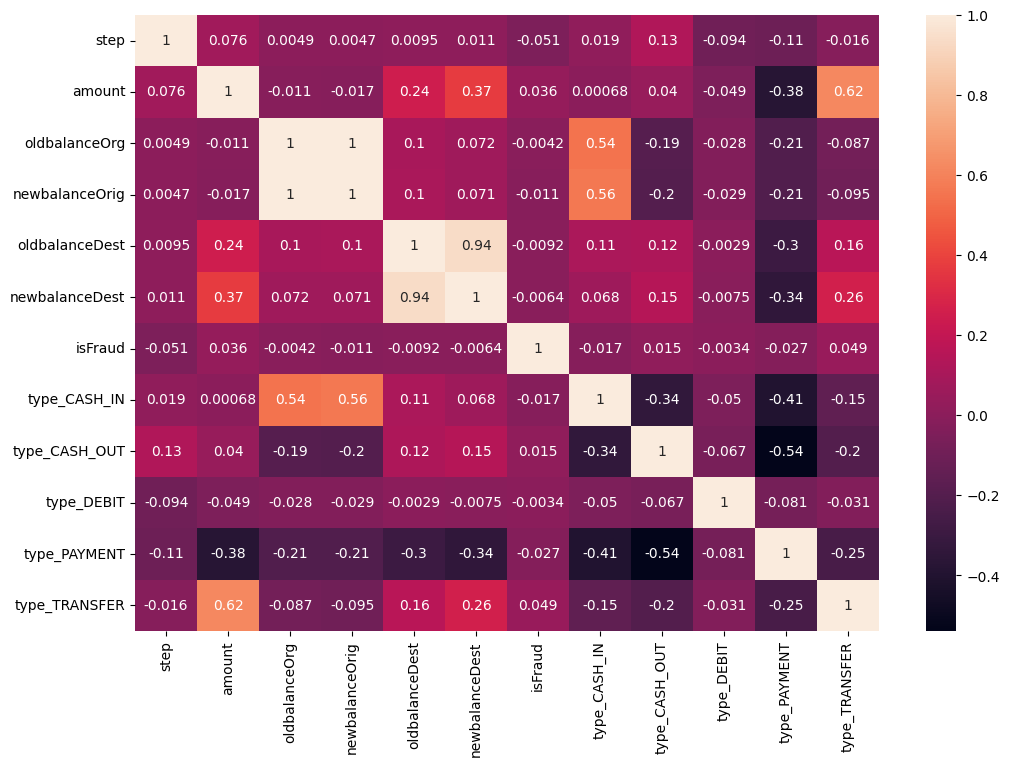

In [49]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, annot=True)

#balanceamento dos dados

In [59]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [61]:
df_balanced_oversampling = pd.concat([y_resampled, X_resampled], axis=1)
df_balanced_oversampling

,isFraud,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [62]:
df_balanced_oversampling.groupby('isFraud').step.count()

isFraud
0    101497
1    101497
Name: step, dtype: int64

#Definindo Train e Test


In [63]:
#UTILIZANDO O DATASET ORIGINAL PARA TREINO E TESTE
X = df.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
#ALTERANDO O X_TRAIN PARA O DATASET COM OVERSAMPLING
df_train = df_balanced_oversampling
df_test = df

X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']

In [ ]:
#ALTERANDO O X_TRAIN PARA O DATASET COM UNDERSAMPLING
df_train = df_balanced_undersampling
df_test = df

X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']

#**Regressão Logistica**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9251094818678345
Precisão: 0.01297016861219196
Recall: 1.0
F1: 0.025608194622279132


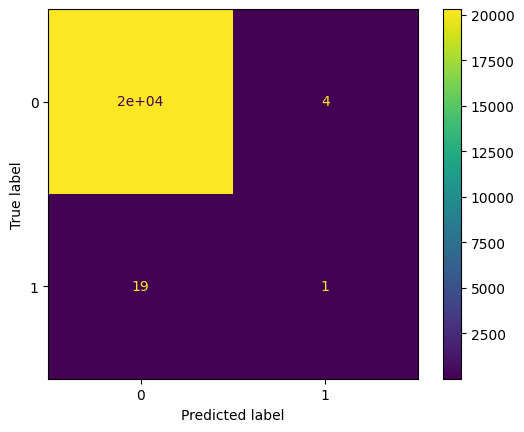

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

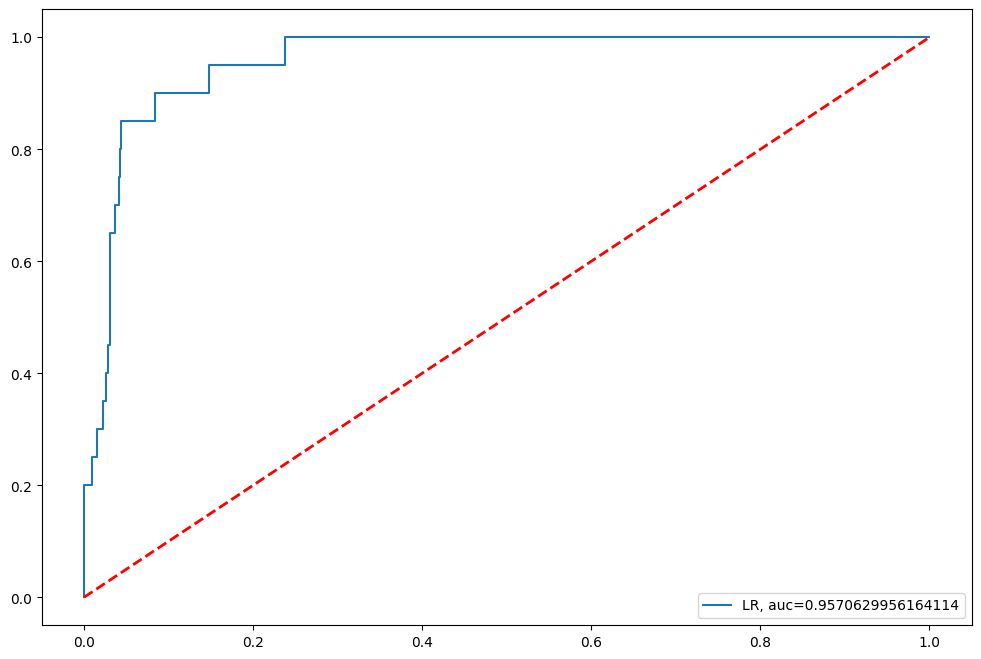

In [13]:
y_pred_proba = reg_log.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

por conta do dominio da variavel não fraude no dataset temos uma boa acuracia e area sobre a curva mas as outras metricas estão ruins uma vez que só temos 1 verdadeiro positivo, então vamos tentar minimizar a diferença desses dados.

antes de fazer o balanceamento dos dados vou deixar a versão com o reg_log = LogisticRegression(class_weight='balanced') para comparação, essa metrica visa atribuir um peso maior à classe minoritária pode ajudar o modelo a dar mais importância a essa classe durante o processo de ajuste.

#Regressão Logistica Over sampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9423877435404813
Precisão: 0.9253062586395919
Recall: 0.96175188267935
F1: 0.9431771250880644


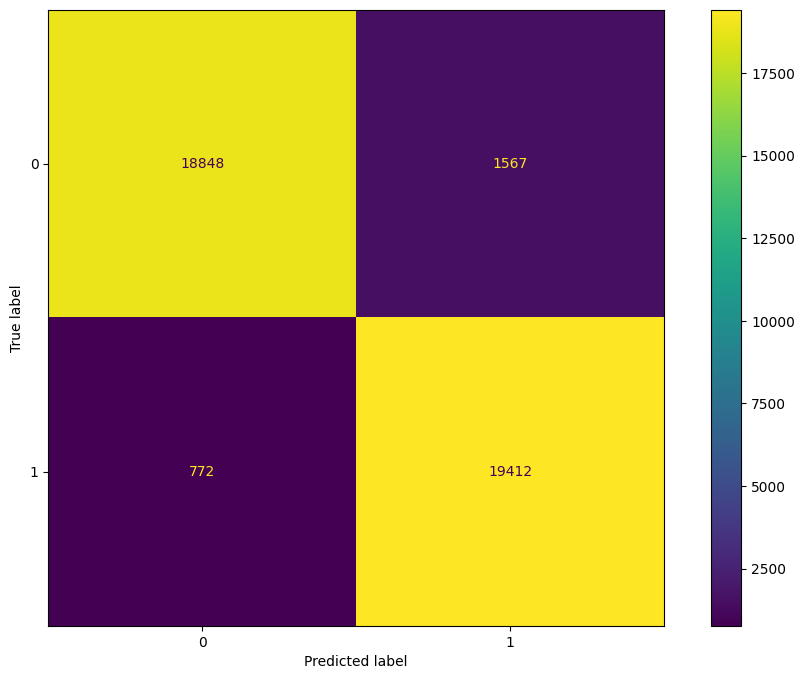

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

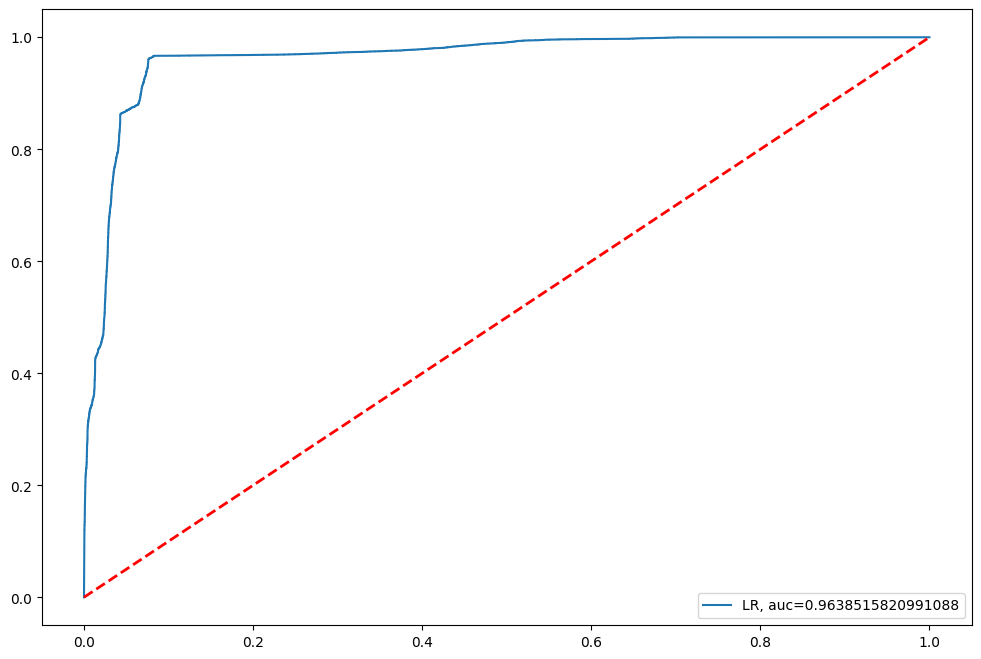

In [19]:
y_pred_proba = reg_log.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [47]:
X = df.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X = df_balanced_oversampling.drop('isFraud', axis=1)
Y = df_balanced_oversampling['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Regressão Logistica CLASS_WEIGHT = 'BALANCED'

In [48]:
reg_log = LogisticRegression(class_weight='balanced')
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.8974068789056734
Precisão: 0.009501187648456057
Recall: 1.0
F1: 0.018823529411764708


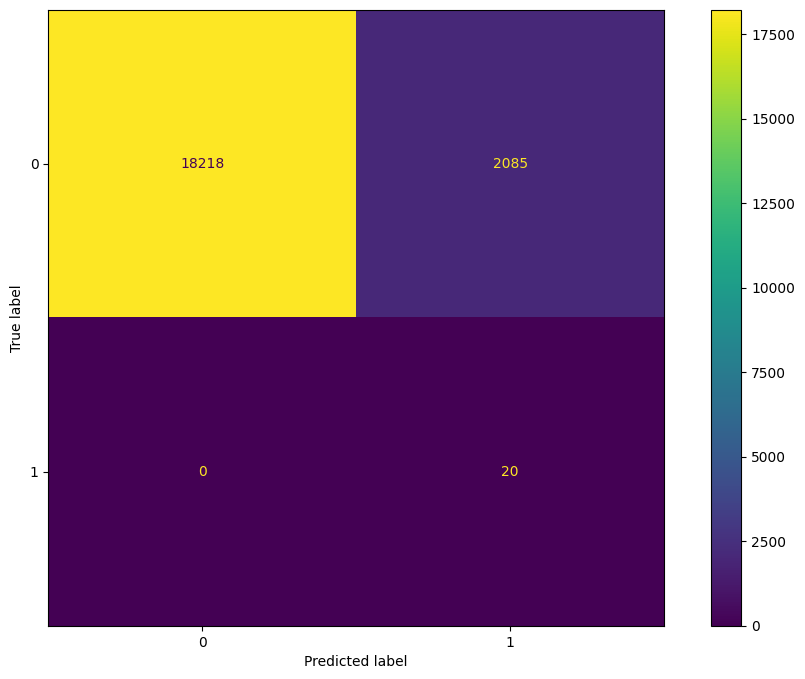

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

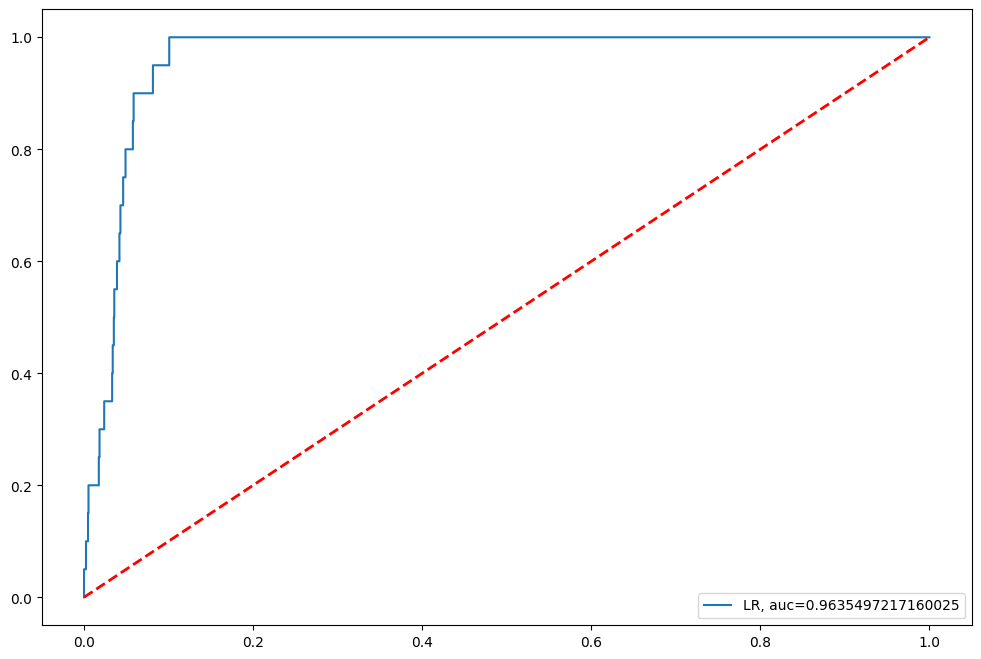

In [ ]:
y_pred_proba = reg_log.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#REGRESSÃO LOGISTICA COM OVERSAMPLING
#Acurácia: 0.9423877435404813
#Precisão: 0.9253062586395919
#Recall: 0.96175188267935
#F1: 0.9431771250880644
#AUC: 0.9636

# utilizando a tecnica de Oversampling para balancear as variaveis de forma a igualar o numero de fraudes e não frauds o modelo apresentou boas metricas. então um primeiro modelo de predição de fraudes.

#Arvore de decisão

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier(max_depth = 5, random_state=42)

model = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9992619199921271
Precisão: 0.8571428571428571
Recall: 0.3
F1: 0.4444444444444444


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt =  DecisionTreeClassifier(max_depth = 5, random_state=42, class_weight='balanced')

model = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9338188259607342
Precisão: 0.01322556943423953
Recall: 0.9
F1: 0.026068066618392467


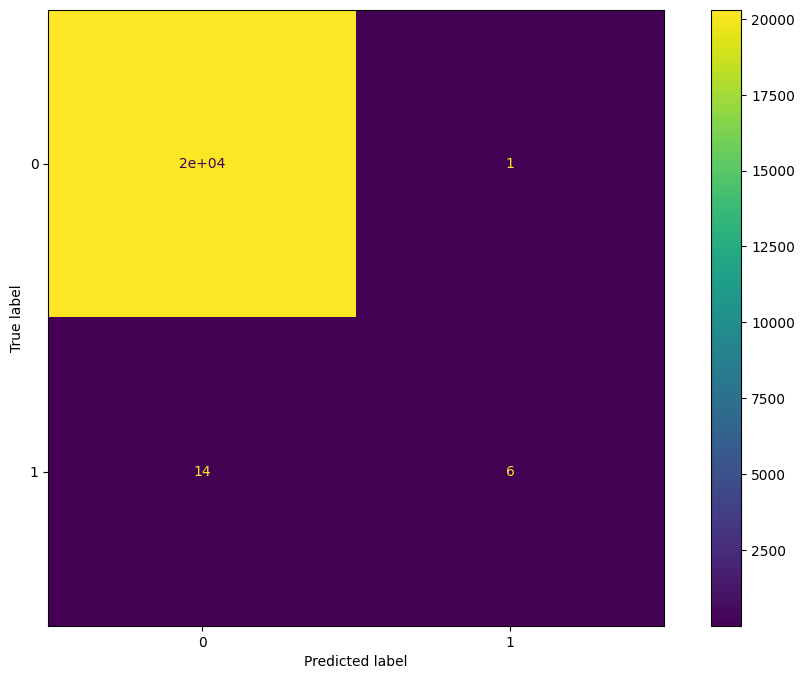

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

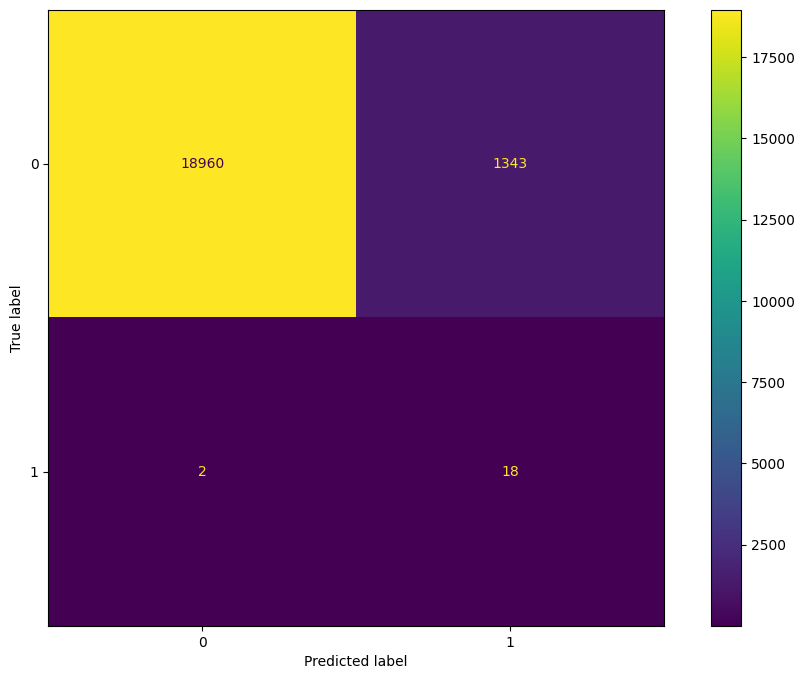

In [46]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

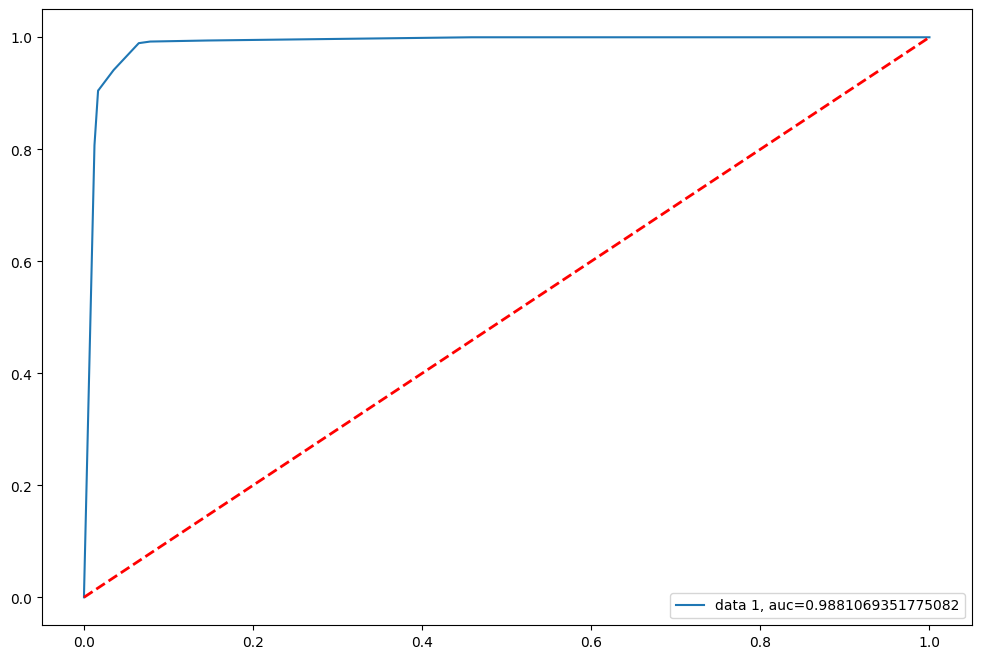

In [ ]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

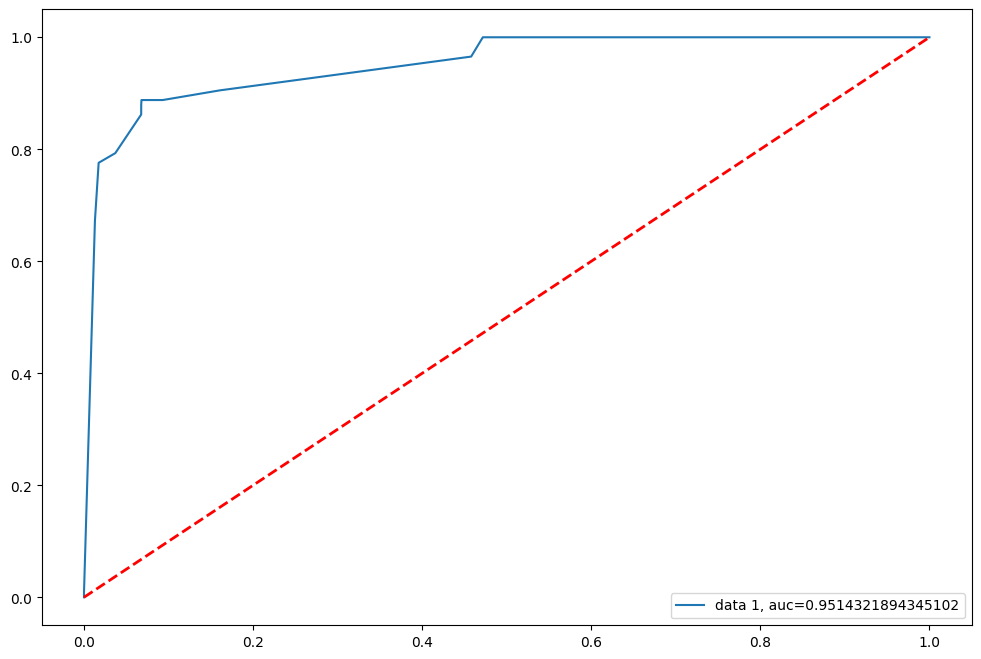

In [37]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#ARVORE DE DECISÃO COM OVERSAMPLING
#Acurácia: 0.9621911869750487
#Precisão: 0.9379138684074578
#Recall: 0.9894470868014269
#F1: 0.9629915374786027
#AUC=0.9881

#RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth= 5, random_state = 42)

model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9737185644966625
Precisão: 0.9733102253032929
Recall: 0.9738406658739596
F1: 0.9735753733376259


In [58]:
rf = RandomForestClassifier(max_depth= 5, random_state = 42, class_weight='balanced')

model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9728564742973965
Precisão: 0.9740634005763689
Recall: 0.9712643678160919
F1: 0.9726618705035971


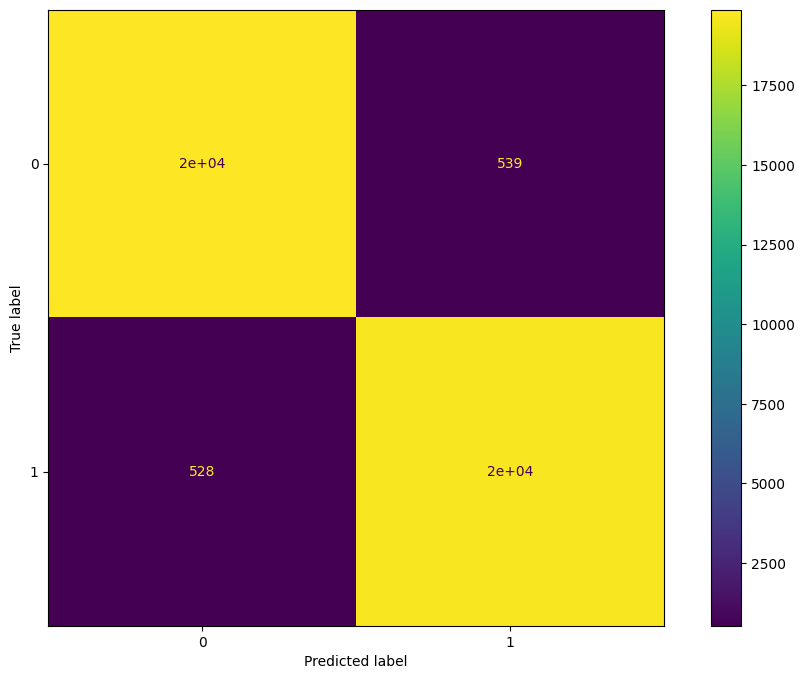

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

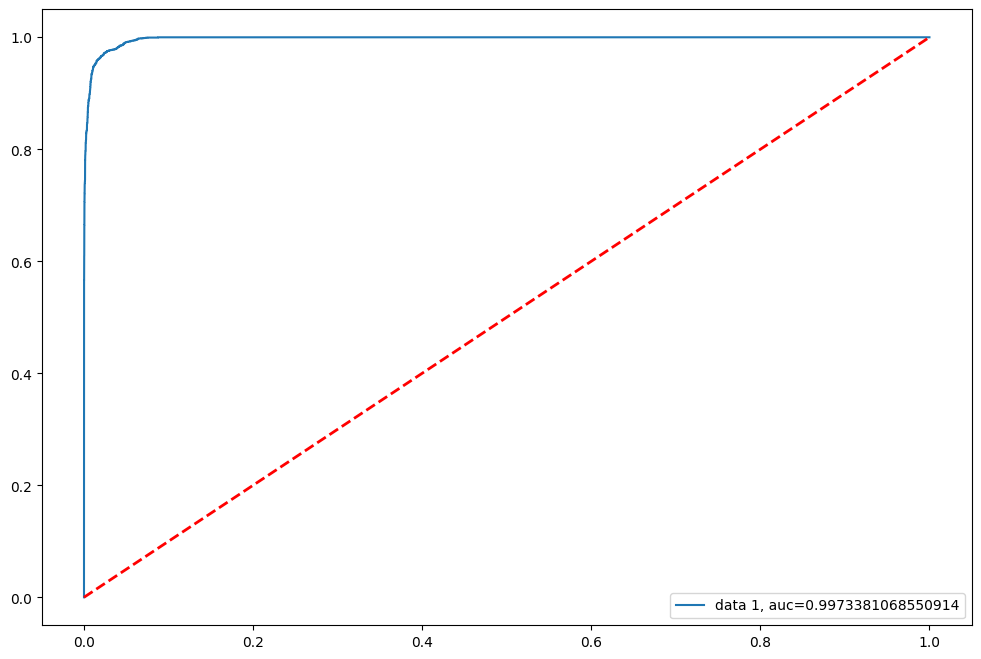

In [ ]:
y_pred_proba =  rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#RANDOM FOREST COM OVERSAMPLING
#Acurácia: 0.9737185644966625
#Precisão: 0.9733102253032929
#Recall: 0.9738406658739596
#F1: 0.9735753733376259
#AUC=0.9973

In [30]:
df_train = df_balanced_oversampling
df_test = df

X_train = df_train.drop('isFraud', axis=1)
y_train = df_train['isFraud']

X_test = df_test.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y_test = df_test['isFraud']

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9226476927164832
Precisão: 0.013323278029160382
Recall: 0.9137931034482759
F1: 0.02626362735381566


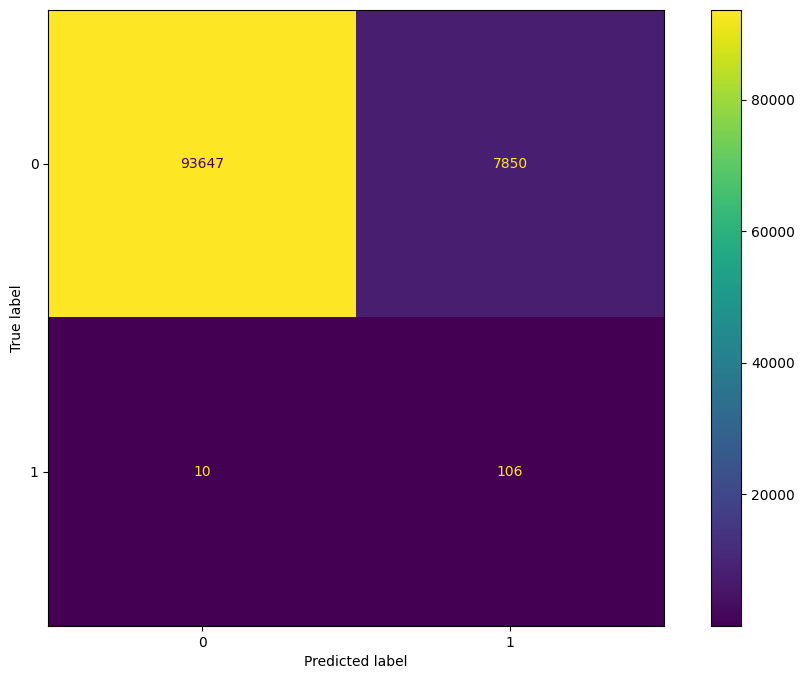

In [31]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

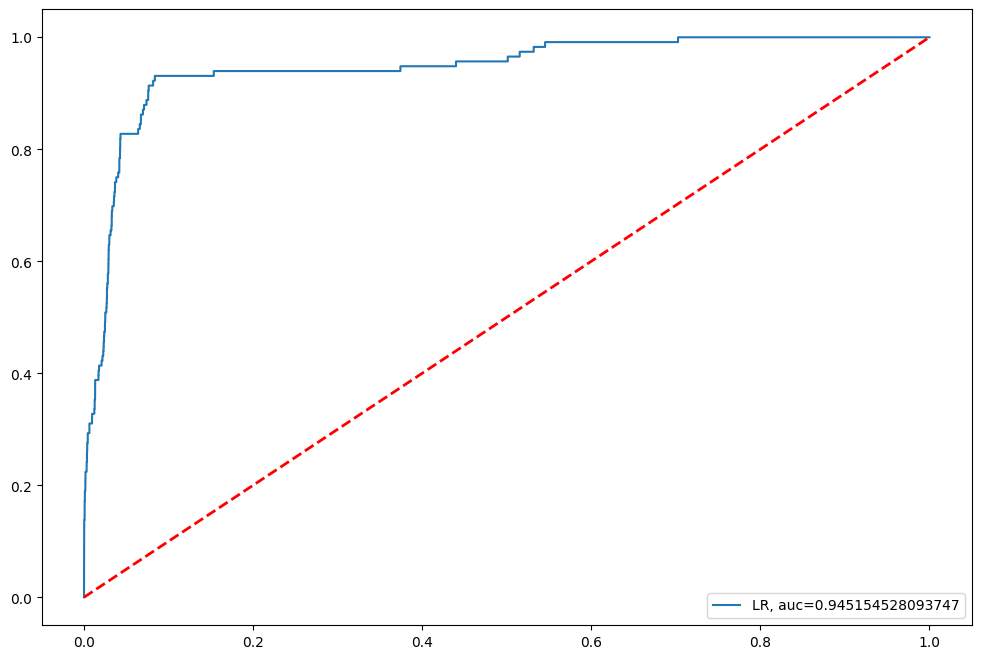

In [24]:
y_pred_proba = reg_log.predict_proba(X_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)